In [1]:
library(dplyr)
library(tidyr)
library(lubridate)
library(ggplot2)




Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# URL of the dataset on UCI Machine Learning Repository
url <- "https://archive.ics.uci.edu/static/public/360/air+quality.zip"

# Download the zip file and extract it
download.file(url, destfile = "air_quality.zip")
unzip("air_quality.zip")

# Read the dataset into R
air_quality <- read.csv("AirQualityUCI.csv", sep = ";", header = TRUE, na.strings = "-200")

# View the first few rows of the dataset
head(air_quality)


,Date,Time,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH,X,X.1
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<lgl>
1,10/03/2004,18.00.00,"2,6",1360,150,"11,9",1046,166,1056,113,1692,1268,"13,6","48,9","0,7578",NA,NA
2,10/03/2004,19.00.00,2,1292,112,"9,4",955,103,1174,92,1559,972,"13,3","47,7","0,7255",NA,NA
3,10/03/2004,20.00.00,"2,2",1402,88,"9,0",939,131,1140,114,1555,1074,"11,9","54,0","0,7502",NA,NA
4,10/03/2004,21.00.00,"2,2",1376,80,"9,2",948,172,1092,122,1584,1203,"11,0","60,0","0,7867",NA,NA
5,10/03/2004,22.00.00,"1,6",1272,51,"6,5",836,131,1205,116,1490,1110,"11,2","59,6","0,7888",NA,NA
6,10/03/2004,23.00.00,"1,2",1197,38,"4,7",750,89,1337,96,1393,949,"11,2","59,2","0,7848",NA,NA


In [3]:
# Clean the data: Convert commas to dots for numeric columns, remove unwanted columns (X, X.1), and remove NA columns
air_quality_cleaned <- air_quality |>
  mutate_at(vars(-Date, -Time), ~as.numeric(gsub(",", ".", .))) |>
  select(-X, -X.1)

# Convert Date and Time columns to proper formats
air_quality_cleaned$Date <- as.Date(air_quality_cleaned$Date, format = "%d/%m/%Y")
air_quality_cleaned$Time <- as.POSIXct(air_quality_cleaned$Time, format = "%H.%M.%S")

head(air_quality_cleaned)


,Date,Time,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH
,<date>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2004-03-10,2023-07-30 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2,2004-03-10,2023-07-30 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
3,2004-03-10,2023-07-30 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
4,2004-03-10,2023-07-30 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
5,2004-03-10,2023-07-30 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
6,2004-03-10,2023-07-30 23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848


In [4]:
# Rename the column names to more descriptive names
col_names <- c("Date", "Time", "CO_Concentration", "PT08_S1_CO_Sensor", "NMHC_Concentration",
               "C6H6_Concentration", "PT08_S2_NMHC_Sensor", "NOx_Concentration", "PT08_S3_NOx_Sensor",
               "NO2_Concentration", "PT08_S4_NO2_Sensor", "PT08_S5_O3_Sensor", "Temperature", "Relative_Humidity", "Absolute_Humidity")

colnames(air_quality_cleaned) <- col_names


In [5]:
head(air_quality_cleaned)

,Date,Time,CO_Concentration,PT08_S1_CO_Sensor,NMHC_Concentration,C6H6_Concentration,PT08_S2_NMHC_Sensor,NOx_Concentration,PT08_S3_NOx_Sensor,NO2_Concentration,PT08_S4_NO2_Sensor,PT08_S5_O3_Sensor,Temperature,Relative_Humidity,Absolute_Humidity
,<date>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2004-03-10,2023-07-30 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2,2004-03-10,2023-07-30 19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
3,2004-03-10,2023-07-30 20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
4,2004-03-10,2023-07-30 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
5,2004-03-10,2023-07-30 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
6,2004-03-10,2023-07-30 23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848


[1] "Plot 1: Hourly Averaged Sensor Responses"


Warning message:
“Removed 114 row(s) containing missing values (geom_path).”
Warning message:
“Removed 114 row(s) containing missing values (geom_path).”
Warning message:
“Removed 114 row(s) containing missing values (geom_path).”
Warning message:
“Removed 114 row(s) containing missing values (geom_path).”
Warning message:
“Removed 114 row(s) containing missing values (geom_path).”


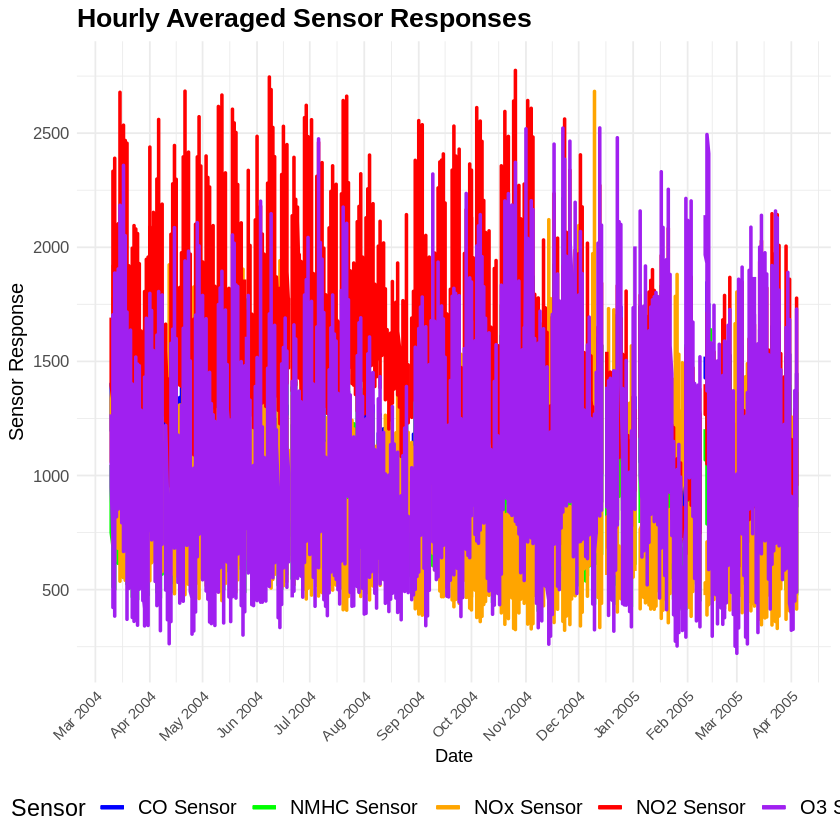

In [22]:
print("Plot 1: Hourly Averaged Sensor Responses")


# Create the plot
air_quality_cleaned_plot <- ggplot(air_quality_cleaned, aes(x = Date)) +
  geom_line(aes(y = PT08_S1_CO_Sensor, color = "CO Sensor"), size = 1) +
  geom_line(aes(y = PT08_S2_NMHC_Sensor, color = "NMHC Sensor"), size = 1) +
  geom_line(aes(y = PT08_S3_NOx_Sensor, color = "NOx Sensor"), size = 1) +
  geom_line(aes(y = PT08_S4_NO2_Sensor, color = "NO2 Sensor"), size = 1) +
  geom_line(aes(y = PT08_S5_O3_Sensor, color = "O3 Sensor"), size = 1) +
  labs(title = "Hourly Averaged Sensor Responses",
       x = "Date",
       y = "Sensor Response",
       color = "Sensor") +
  scale_color_manual(values = c("CO Sensor" = "blue", "NMHC Sensor" = "green", "NOx Sensor" = "orange", "NO2 Sensor" = "red", "O3 Sensor" = "purple")) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.text.y = element_text(size = 10),  # Adjust the size of y-axis labels
    axis.title.y = element_text(size = 12),  # Adjust the size of y-axis title
    plot.title = element_text(size = 16, face = "bold"),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 14),
    legend.position = "bottom"
  ) +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %Y") +
  scale_y_continuous(breaks = seq(0, 2500, by = 500))  # Adjust the y-axis tick marks

air_quality_cleaned_plot



Warning message:
“Removed 570 row(s) containing missing values (geom_path).”


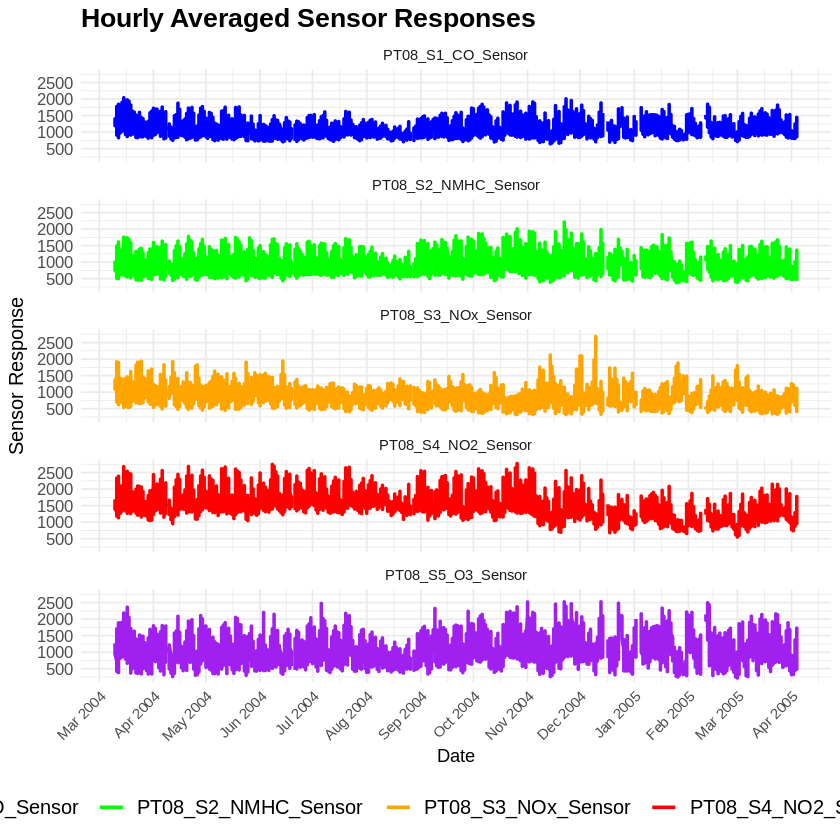

In [11]:
print("Plot 2: Hourly Averaged Sensor Responses")


# Pivot the data to long format for ggplot
air_quality_melted <- pivot_longer(air_quality_cleaned, 
                                   cols = starts_with("PT08_S"), 
                                   names_to = "Sensor",
                                   values_to = "Sensor_Response")

# Create the plot
air_quality_sensor_plots <- ggplot(air_quality_melted, aes(x = Date, y = Sensor_Response, color = Sensor)) +
  geom_line(size = 1) +
  labs(title = "Hourly Averaged Sensor Responses",
       x = "Date",
       y = "Sensor Response",
       color = "Sensor") +
  scale_color_manual(values = c("PT08_S1_CO_Sensor" = "blue", "PT08_S2_NMHC_Sensor" = "green", 
                                "PT08_S3_NOx_Sensor" = "orange", "PT08_S4_NO2_Sensor" = "red",
                                "PT08_S5_O3_Sensor" = "purple")) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.text.y = element_text(size = 10),  # Adjust the size of y-axis labels
    axis.title.y = element_text(size = 12),  # Adjust the size of y-axis title
    plot.title = element_text(size = 16, face = "bold"),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 14),
    legend.position = "bottom"
  ) +
  scale_x_date(date_breaks = "1 month", date_labels = "%b %Y") +
  scale_y_continuous(breaks = seq(0, 2500, by = 500))  # Adjust the y-axis tick marks

# Separate plots for each sensor using facets
air_quality_sensor_plots_faceted <- air_quality_sensor_plots + 
  facet_wrap(~ Sensor, nrow = 5)

air_quality_sensor_plots_faceted

In [21]:
print("Table 1: Summary Statistics of Each Sensor Responses")

# Group the data by "Sensor" and calculate summary statistics
sensor_summary <- air_quality_melted %>%
  group_by(Sensor) %>%
  summarize(
    Mean_Sensor_Response = mean(Sensor_Response, na.rm = TRUE),
    Median_Sensor_Response = median(Sensor_Response, na.rm = TRUE),
    SD_Sensor_Response = sd(Sensor_Response, na.rm = TRUE),
    Min_Sensor_Response = min(Sensor_Response, na.rm = TRUE),
    Max_Sensor_Response = max(Sensor_Response, na.rm = TRUE)
  )

# Print the tibble
sensor_summary

[1] "Table 1: Summary Statistics of Each Sensor Responses"


Sensor,Mean_Sensor_Response,Median_Sensor_Response,SD_Sensor_Response,Min_Sensor_Response,Max_Sensor_Response
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PT08_S1_CO_Sensor,1099.8332,1063,217.0800,647,2040
PT08_S2_NMHC_Sensor,939.1534,909,266.8314,383,2214
PT08_S3_NOx_Sensor,835.4936,806,256.8173,322,2683
PT08_S4_NO2_Sensor,1456.2646,1463,346.2068,551,2775
PT08_S5_O3_Sensor,1022.9061,963,398.4843,221,2523


In [7]:
air_quality_cleaned <- air_quality_cleaned %>%
  mutate(Time = as.POSIXct(Time, format = "%H:%M:%S"),  # Convert Time to POSIXct format
         Day_Night = ifelse(hour(Time) < 12, "Day", "Night"),  # Create Day_Night column
         AQI_Estimator = rowMeans(select(., PT08_S1_CO_Sensor,PT08_S2_NMHC_Sensor,PT08_S3_NOx_Sensor, PT08_S4_NO2_Sensor, PT08_S5_O3_Sensor),
                                       na.rm = TRUE))  # Calculate mean of sensor values

# Select only the Day_Night column and the new Mean_Sensor_Values column
air_quality_final <- air_quality_cleaned %>%
  select(Day_Night, AQI_Estimator) |>
  filter(!is.na(AQI_Estimator))

head(air_quality_final)

,Day_Night,AQI_Estimator
,<chr>,<dbl>
1,Night,1284.4
2,Night,1190.4
3,Night,1222.0
4,Night,1240.6
5,Night,1182.6
6,Night,1125.2


[1] "Plot 3: Box Plot of AQI Estimator Values by Day and Night"


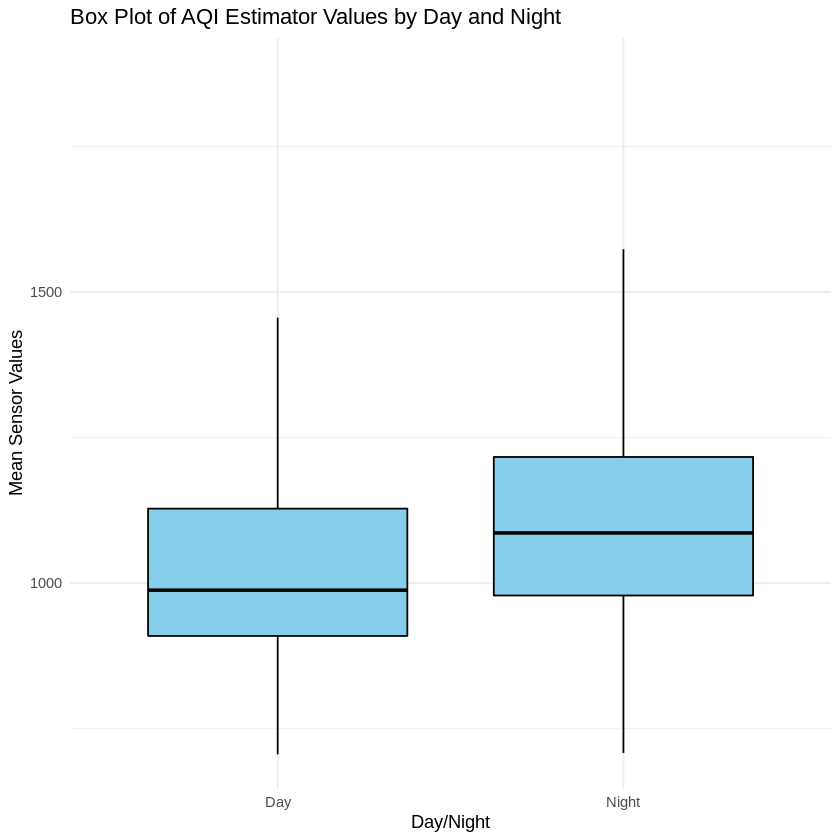

In [23]:
print("Plot 3: Box Plot of AQI Estimator Values by Day and Night")

# Create a box plot
boxplot <- ggplot(air_quality_final, aes(x = Day_Night, y = AQI_Estimator)) +
  geom_boxplot(fill = "skyblue", color = "black", outlier.shape = NA) +
  labs(title = "Box Plot of AQI Estimator Values by Day and Night",
       x = "Day/Night",
       y = "Mean Sensor Values") +
  theme_minimal()

print(boxplot)

In [18]:
print("Table 2: Summary Statistics of AQI Estimator by Day and Night")


# Group the data by "Day_Night" and calculate the mean, median, standard deviation, and quartiles of "AQI_Estimator"
stats_by_day_night <- air_quality_final %>%
  group_by(Day_Night) %>%
  summarize(
    AQI_Estimator_Mean = mean(AQI_Estimator, na.rm = TRUE),
    AQI_Estimator_Median = median(AQI_Estimator, na.rm = TRUE),
    AQI_Estimator_SD = sd(AQI_Estimator, na.rm = TRUE),
    AQI_Estimator_Q1 = quantile(AQI_Estimator, 0.25, na.rm = TRUE),
    AQI_Estimator_Q3 = quantile(AQI_Estimator, 0.75, na.rm = TRUE)
  )

# Print the tibble
stats_by_day_night

[1] "Table 2: Summary Statistics of AQI Estimator by Day and Night"


Day_Night,AQI_Estimator_Mean,AQI_Estimator_Median,AQI_Estimator_SD,AQI_Estimator_Q1,AQI_Estimator_Q3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Day,1033.722,988.0,179.8334,909.3,1128.05
Night,1107.978,1086.2,184.6012,978.8,1216.80


In [ ]:


# Calculate the means for Day and Night
mean_day <- mean(air_quality_final$AQI_Estimator[air_quality_final$Day_Night == "Day"], na.rm = TRUE)
mean_night <- mean(air_quality_final$AQI_Estimator[air_quality_final$Day_Night == "Night"], na.rm = TRUE)

print("Plot 4: Distribution of AQI Estimator for Day and Night")

ggplot(air_quality_final, aes(x = AQI_Estimator, fill = Day_Night)) +
  geom_histogram(binwidth = 50, position = "dodge", alpha = 0.7) +
  geom_vline(xintercept = mean_day, linetype = "dashed", color = "blue", size = 1) +
  geom_vline(xintercept = mean_night, linetype = "dashed", color = "green", size = 1) +
  labs(title = "Distribution of AQI Estimator for Day and Night",
       x = "AQI Estimator",
       y = "Frequency") +
  scale_x_continuous(breaks = seq(0, 2500, by = 250)) +
  scale_fill_manual(values = c("Day" = "blue", "Night" = "green")) +
  theme_minimal() +
  facet_wrap(~Day_Night, ncol = 1)

[1] "Plot 4: Distribution of AQI Estimator for Day and Night"
